In [1]:
from matplotlib import pyplot as plt

import matplotlib
import os
import random
import torch
from torch.autograd import Variable
import torchvision.transforms as standard_transforms
import misc.transforms as own_transforms
import pandas as pd

from models.CC import CrowdCounter
from config import cfg
from misc.utils import *
import scipy.io as sio
from PIL import Image, ImageOps

torch.cuda.set_device(0)
torch.backends.cudnn.benchmark = True

In [2]:
exp_name = '../SHHB_results'
if not os.path.exists(exp_name):
    os.mkdir(exp_name)

mean_std = ([0.452016860247, 0.447249650955, 0.431981861591],[0.23242045939, 0.224925786257, 0.221840232611])
img_transform = standard_transforms.Compose([
        standard_transforms.ToTensor(),
        standard_transforms.Normalize(*mean_std)
    ])
restore = standard_transforms.Compose([
        own_transforms.DeNormalize(*mean_std),
        standard_transforms.ToPILImage()
    ])
pil_to_tensor = standard_transforms.ToTensor()

dataRoot = '../ProcessedData/C3Data/test'

model_path = '../PretrainedModels/11-ResSFCN-101_all_ep_94_mae_26.8_mse_66.1.pth'

In [3]:
net = CrowdCounter(cfg.GPU_ID,cfg.NET)
net.load_state_dict(torch.load(model_path))
net.cuda()
net.eval()

CrowdCounter(
  (CCN): DataParallel(
    (module): Res101_SFCN(
      (backend): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
        (1): ReLU(inplace=True)
        (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
        (3): ReLU(inplace=True)
        (4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
        (5): ReLU(inplace=True)
        (6): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
        (7): ReLU(inplace=True)
        (8): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
        (11): ReLU(inplace=True)
      )
      (convDU): convDU(
        (conv): Sequential(
          (0): Conv2d(64, 64, kernel_size=(1, 9), stride=(1, 1), 

In [4]:
file_list = [filename for root,dirs,filename in os.walk(dataRoot+'/img/')]                                           

In [5]:
f1 = plt.figure(1)
gts = []
preds = []

<Figure size 432x288 with 0 Axes>

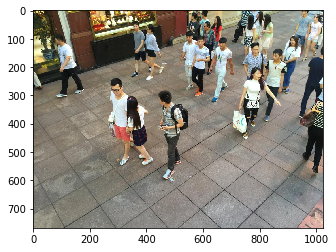

In [8]:
img = Image.open(imgname)
plt.imshow(img)

In [7]:
print(np.sum(den))


22.829575


In [9]:
if img.mode == 'L':
    img = img.convert('RGB')
img = img_transform(img)

In [10]:
gt = np.sum(den)
with torch.no_grad():
    img = Variable(img[None,:,:,:]).cuda()
    pred_map = net.test_forward(img)

pred_map = pred_map.cpu().data.numpy()[0,0,:,:]
pred = np.sum(pred_map)/100.0
pred_map = pred_map/np.max(pred_map+1e-20)
print("{} people".format(pred.round()))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


18.0 people


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:2404: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


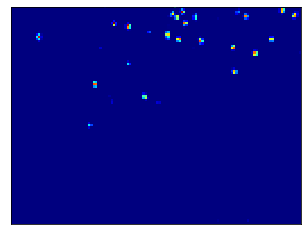

In [12]:
pred_frame = plt.gca()
plt.imshow(pred_map, 'jet')
pred_frame.axes.get_yaxis().set_visible(False)
pred_frame.axes.get_xaxis().set_visible(False)